# Explore here

It's recommended to use this notebook for exploration purposes.

(0, 2024, 97.15)
(1, 2023, 96.77)
(2, 2022, 81.46)
(3, 2021, 53.82)
(4, 2020, 31.53)
(5, 2019, 24.57)
(6, 2018, 21.46)
(7, 2017, 11.75)
(8, 2016, 7.0)
(9, 2015, 4.04)
(10, 2014, 3.19)
(11, 2013, 2.01)
(12, 2012, 0.41)
(13, 2011, 0.2)
(14, 2010, 0.11)
(15, 2009, 0.11)


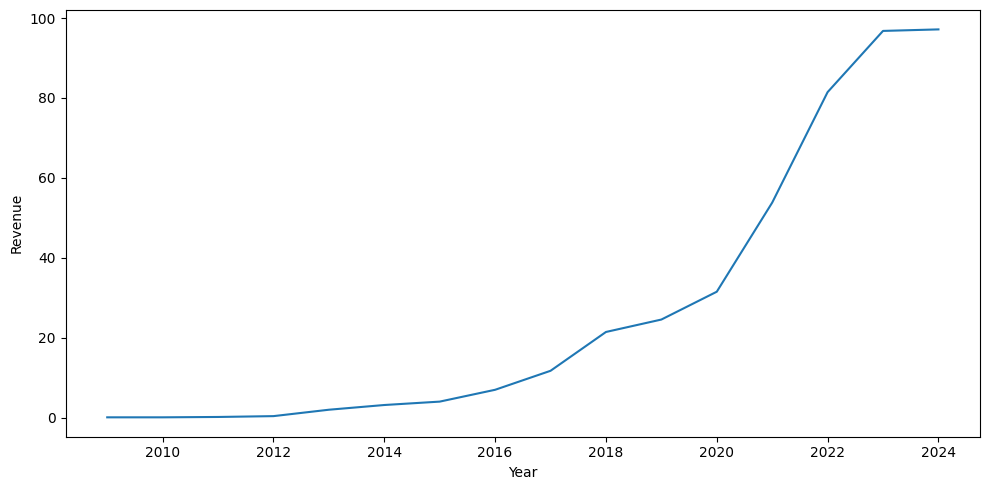

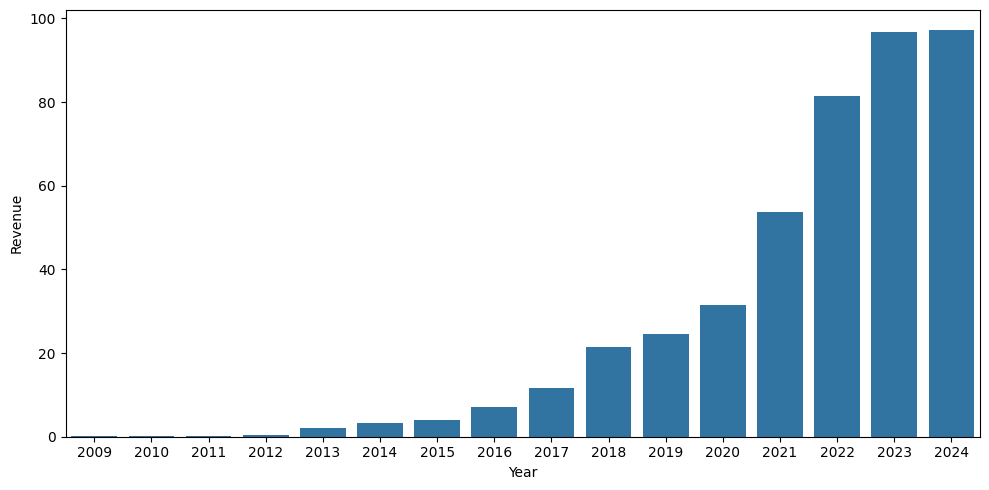

In [ ]:
import io
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

resource_url = "https://companiesmarketcap.com/tesla/revenue/"

response = requests.get(resource_url)

#Filter for a 200 OK response, else printing the response to know what we get after the request 
if response: 
    soup = BeautifulSoup(response.text, "html.parser")
else:
    print(response)


#Using pandas to convert the table inside the URL to a dataframe
tesla_df = pd.read_html(io.StringIO(str(soup.find_all("table"))))[0]

#Processing the dataframe to leave clean values
#First the year, not using date type to avoid mistakes and converting to int64
tesla_df.loc[0, "Year"] = tesla_df.loc[0, "Year"].replace("(TTM)", "")
tesla_df["Year"] = pd.to_numeric(tesla_df["Year"])

#Convert the revenue from object to float replacing the $ and B symbols to none
tesla_df['Revenue'] = tesla_df['Revenue'].astype('string')
tesla_df['Revenue'] = tesla_df['Revenue'].str.replace("$", "").str.replace(" B", "")
tesla_df['Revenue'] = pd.to_numeric(tesla_df["Revenue"])

#Since the exercise requires only to work with the year and the revenue "Change" column will not be altered.

#Connect to the database and create the new table with only the Year and Revenue data
connection = sqlite3.connect("Tesla_Revenues.db")
cursor = connection.cursor()
#tesla_df[["Year", "Revenue"]].to_sql('TeslaTable', connection)

for row in cursor.execute("SELECT * FROM newTable"):
    print(row)

#Visualization of the data, first as a lineplot and then as barplot
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = tesla_df, x = "Year", y = "Revenue")
plt.tight_layout()
plt.show()

fig, axis = plt.subplots(figsize = (10, 5))

sns.barplot(data = tesla_df, x = "Year", y = "Revenue")
plt.tight_layout()
plt.show()

